Name: Smayan Kulkarni

Roll No.: D100

SAP ID: 60009230142

Batch: D2-2

Colab Link: 

Task 1: On synthetic dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
warnings.filterwarnings('ignore')

Generating a synthetic dataset

In [2]:
np.random.seed(42)

n_samples = 1000

age = np.random.randint(18, 65, size=n_samples)  
income = np.random.randint(20000, 100000, size=n_samples)  
previous_purchases = np.random.randint(0, 20, size=n_samples) 
region = np.random.choice(["North", "South", "East", "West"], size=n_samples)  

region_encoded = pd.get_dummies(region, drop_first=True)

# Generate binary target variable (purchase: 1, no purchase: 0) based on a logistic function
prob = 1 / (1 + np.exp(-(0.02 * age + 0.00005 * income + 0.1 * previous_purchases - 2)))
purchase = np.random.binomial(1, prob, size=n_samples)

df = pd.DataFrame({
    "Age": age,
    "Income": income,
    "Previous_Purchases": previous_purchases,
    "Region": region,
    "Purchase": purchase
})

df = pd.concat([df, region_encoded], axis=1)

df.drop(columns=["Region"], inplace=True)

df.to_csv("synthetic_logistic_data.csv", index=False)

df.head()

,Age,Income,Previous_Purchases,Purchase,North,South,West
0,56,25287,7,1,False,False,True
1,46,54387,15,1,False,False,True
2,32,28512,9,0,False,False,True
3,60,21342,3,0,True,False,False
4,25,83076,17,1,True,False,False


Performing Logistic Regression from scratch

In [3]:
from scipy.special import expit  # Safe sigmoid function
from sklearn.preprocessing import StandardScaler  # Feature scaling

class LogisticRegression:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return expit(z)  # More stable than np.exp

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_model)
        return np.array([1 if p > 0.5 else 0 for p in predictions])

In [4]:
df[["North", "South", "West"]] = df[["North", "South", "West"]].astype(int)

# Step 2: Separate features (X) and target (y)
X = df.drop(columns=["Purchase"]).values  # Convert features to NumPy array
y = df["Purchase"].values  # Target variable

# Step 3: Ensure all data is float64
X = np.array(X, dtype=np.float64)
y = np.array(y, dtype=np.float64).flatten()

In [5]:
# Train custom model
custom_model = LogisticRegression()
custom_model.fit(X, y)

# Predict with custom model
y_pred_custom = custom_model.predict(X)

With in-built libraries

In [6]:
from sklearn.linear_model import LogisticRegression
sklearn_model = LogisticRegression()
sklearn_model.fit(X, y)

y_pred_sklearn = sklearn_model.predict(X)

In [7]:
from sklearn.metrics import f1_score

f1_custom = f1_score(y, y_pred_custom)
print(f"F1 Score (Custom Model): {f1_custom}")

f1_sklearn = f1_score(y, y_pred_sklearn)
print(f"F1 Score (Scikit-learn Model): {f1_sklearn}")

F1 Score (Custom Model): 0.9517819706498952
F1 Score (Scikit-learn Model): 0.9517819706498952


Task 2: Multimodal classification

In [8]:
df = pd.read_csv("Iris.csv")

In [9]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

df.drop('Id', axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(df.drop('Species', axis=1), df['Species'], test_size=0.2, random_state=42)

clf = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=200)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

train_accuracy = clf.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

test_accuracy = clf.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

Overall Accuracy: 1.0
Training Accuracy: 0.975
Test Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


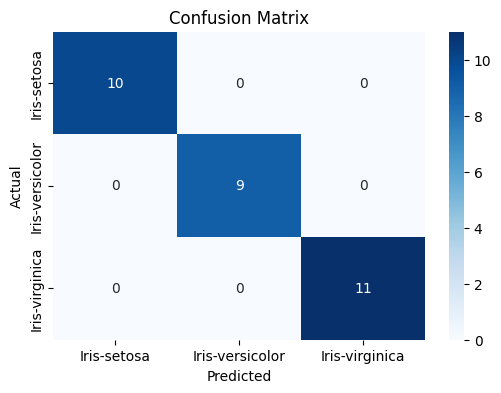

In [11]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_) # Use le.classes_ for labels
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

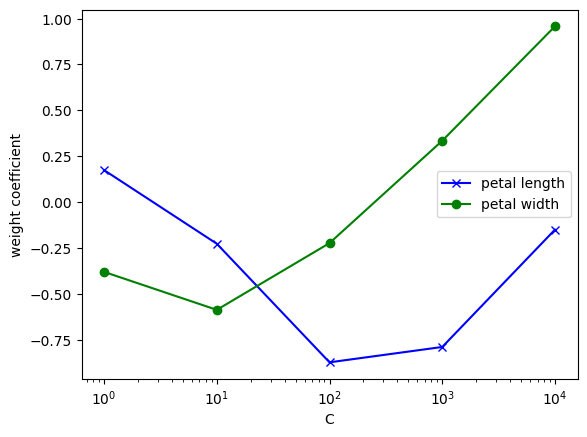

In [12]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

weights, params = [], []
for c in np.arange(0, 5):
   lr = LogisticRegression(C=10**c, random_state=0)
   lr.fit(X_train_std, y_train)
   weights.append(lr.coef_[1])
   params.append(10**c)

weights = np.array(weights)

plt.plot(params, weights[:, 0], color='blue', marker='x', label='petal length')
plt.plot(params, weights[:, 1], color='green',  marker='o', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='right')
plt.xscale('log')
plt.show()

In [13]:
clf_reg = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=200, C=1.0)
clf_reg.fit(X_train, y_train)

clf_no_reg = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=200, C=1e10)
clf_no_reg.fit(X_train, y_train)

y_pred_reg = clf_reg.predict(X_test)
y_pred_no_reg = clf_no_reg.predict(X_test)

accuracy_reg = accuracy_score(y_test, y_pred_reg)
accuracy_no_reg = accuracy_score(y_test, y_pred_no_reg)

print("Coefficients with Regularization:\n", clf_reg.coef_)
print("Coefficients without Regularization:\n", clf_no_reg.coef_)

print("With Regularization - Accuracy:", accuracy_reg)
print("Without Regularization - Accuracy:", accuracy_no_reg)

confusion_reg = confusion_matrix(y_test, y_pred_reg)
confusion_no_reg = confusion_matrix(y_test, y_pred_no_reg)

Coefficients with Regularization:
 [[-2.4707701  -1.04778253]
 [ 0.06365796 -0.6475396 ]
 [ 2.40711214  1.69532213]]
Coefficients without Regularization:
 [[ -6.89309023 -16.87902141]
 [  0.71298802   4.2537833 ]
 [  6.18010221  12.62523812]]
With Regularization - Accuracy: 0.9777777777777777
Without Regularization - Accuracy: 0.9777777777777777


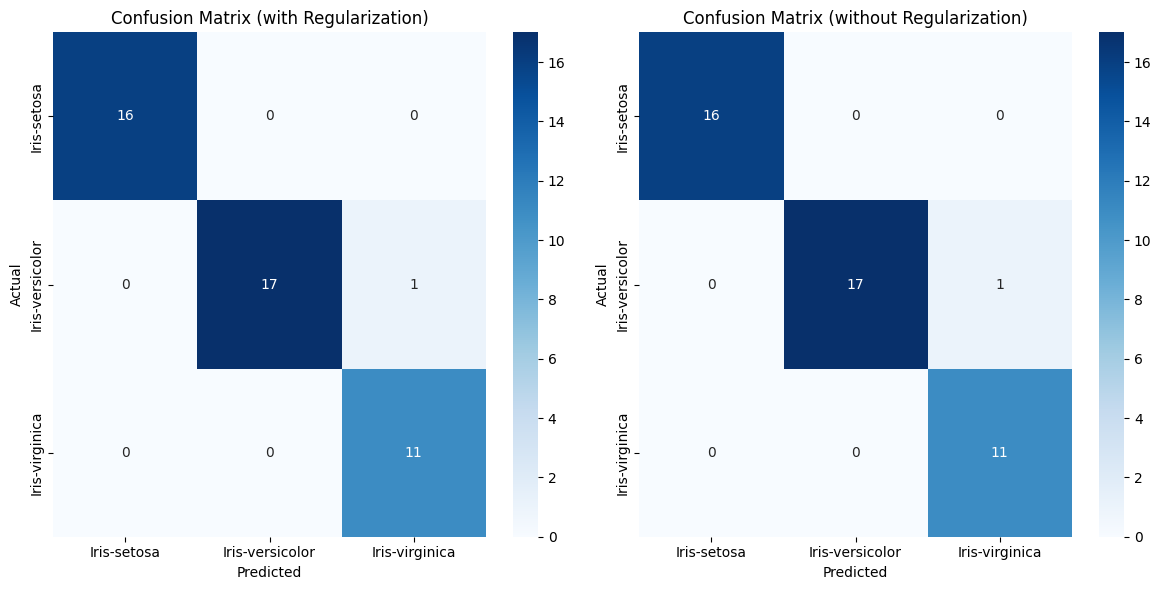

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Confusion matrix with regularization
sns.heatmap(confusion_reg, annot=True, fmt="d", cmap="Blues", ax=axes[0],
            xticklabels=le.classes_, yticklabels=le.classes_)
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
axes[0].set_title("Confusion Matrix (with Regularization)")

# Confusion matrix without regularization
sns.heatmap(confusion_no_reg, annot=True, fmt="d", cmap="Blues", ax=axes[1],
            xticklabels=le.classes_, yticklabels=le.classes_)
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
axes[1].set_title("Confusion Matrix (without Regularization)")

plt.tight_layout()
plt.show()